In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200) 

*EDA*

In [140]:
df=pd.read_csv('PBL5recommendationdata.csv', encoding ='latin-1')

In [141]:
df.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [143]:
df.isnull().sum()/len(df)*100
#df.dropna(axis=1, how="all", thresh=None, inplace=False)

Customers.id                        0.000000
Customers.fname                     0.000000
Customers.lname                     0.000000
Customers.company                  82.665713
Customers.create_date               0.000000
Customers.status                   97.591798
Customers.mailing                  49.594659
Customers.reminders               100.000000
Customers.tax_exempt               99.880782
Customers.account_id               99.928469
Customers.sales_rep               100.000000
Customers.rewards                 100.000000
Customers.profile_id              100.000000
Customers.last_modified             0.000000
Customers.customer_type            10.085837
Orders.id                           0.000000
Orders.customer_id                  0.000000
Orders.fname                        0.000000
Orders.lname                        0.000000
Orders.company                     82.641869
Orders.order_number                 0.000000
Orders.reorder_id                  98.044826
Orders.ext

In [144]:
#deleting columns with nan values of above 20 percent.

for i in df.columns:
  if (df[i].isnull().sum()/len(df)*100 >= 20) :
   df.drop(i,axis=1,inplace=True)
df.shape    

(4194, 66)

In [145]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.create_date', 'Customers.last_modified',
       'Customers.customer_type', 'Orders.id', 'Orders.customer_id',
       'Orders.fname', 'Orders.lname', 'Orders.order_number',
       'Orders.currency', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping',
       'Orders.total', 'Orders.shipping_carrier', 'Orders.shipping_method',
       'Orders.tracking', 'Orders.payment_status', 'Orders.payment_date',
       'Orders.payment_type', 'Orders.payment_amount', 'Orders.payment_id',
       'Orders.payment_code', 'Orders.status', 'Orders.placed_date',
       'Orders.updated_date', 'Orders.shipped_date', 'Orders.customer_type',
       'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id',
       'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price',
       'Order_Items.cost', 'Products.id', 'Products.status',
       'Products.template', 'Products.vendor', 'Products.import_id',
       'Products.name

In [146]:
abs(df.corr()['Orders.total']).sort_values(ascending=False)

Orders.total                 1.000000
Orders.subtotal              0.997013
Orders.payment_amount        0.992953
Order_Items.price            0.428587
Order_Items.cost             0.425841
Products.cost                0.422208
Products.price               0.412019
Order_Items.qty              0.384124
Products.list_price          0.380704
Orders.tax                   0.199910
Products.shipping_width      0.177553
Orders.shipping              0.176824
Products.shipping_length     0.162235
Orders.status                0.077309
Products.shipping_height     0.075501
Orders.payment_status        0.074068
Products.import_id           0.070752
Products.status              0.069803
Products.saved_status        0.067432
Products.last_modified       0.060751
Customers.id                 0.037907
Orders.customer_id           0.037907
Products.qb_edit_sequence    0.033725
Products.id                  0.033032
Order_Items.product_id       0.031029
Customers.last_modified      0.030624
Products.sho

In [147]:
df.isnull().sum()

Customers.id                       0
Customers.fname                    0
Customers.lname                    0
Customers.create_date              0
Customers.last_modified            0
Customers.customer_type          423
Orders.id                          0
Orders.customer_id                 0
Orders.fname                       0
Orders.lname                       0
Orders.order_number                0
Orders.currency                    0
Orders.subtotal                    0
Orders.tax                       457
Orders.shipping                  195
Orders.total                       0
Orders.shipping_carrier          617
Orders.shipping_method           443
Orders.tracking                  376
Orders.payment_status              5
Orders.payment_date               18
Orders.payment_type              384
Orders.payment_amount             18
Orders.payment_id                430
Orders.payment_code              748
Orders.status                      0
Orders.placed_date                 0
O

*HANDLE MISSING VALUES*

In [148]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [149]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [150]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

In [151]:
df.to_csv("df.csv")

*CREATE FRAMES TO SQL CONNECTION*

In [152]:
Customer = pd.DataFrame(df, columns= ['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.create_date', 'Customers.last_modified',
       'Customers.customer_type'])

In [153]:
Orders=pd.DataFrame(df, columns= ['Orders.id', 'Orders.customer_id',
       'Orders.fname', 'Orders.lname', 'Orders.order_number',
       'Orders.currency', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping',
       'Orders.total', 'Orders.shipping_carrier', 'Orders.shipping_method',
       'Orders.tracking', 'Orders.payment_status', 'Orders.payment_date',
       'Orders.payment_type', 'Orders.payment_amount', 'Orders.payment_id',
       'Orders.payment_code', 'Orders.status', 'Orders.placed_date',
       'Orders.updated_date', 'Orders.shipped_date', 'Orders.customer_type',
       'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id',
       'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price',
       'Order_Items.cost'])

In [154]:
Products=pd.DataFrame(df, columns= ['Products.id', 'Products.status',
       'Products.template', 'Products.vendor', 'Products.import_id',
       'Products.name', 'Products.display_name', 'Products.list_price',
       'Products.price', 'Products.cost', 'Products.last_modified',
       'Products.shopping_brand', 'Products.shopping_mpn',
       'Products.shopping_flags', 'Products.amazon_item_type',
       'Products.google_shopping_id', 'Products.google_shopping_type',
       'Products.google_shopping_cat', 'Products.quickbooks_id',
       'Products.qb_edit_sequence', 'Products.long_description',
       'Products.seo_title', 'Products.seo_url', 'Products.unit',
       'Products.shipping_length', 'Products.shipping_width',
       'Products.shipping_height', 'Products.family_id',
       'Products.saved_status'])

In [155]:
#pip install pypyodbc

In [156]:
#import pypyodbc
#db = pypyodbc.connect(
#   'Driver={SQL Server};'
#   'Server=serveradi;'
#   'Database=veritabaniadi;'
#   'UID=kullaniciadi;'
#  'PWD=parola;')
#imlec = db.cursor()
#imlec.execute('SELECT * FROM Kisiler')
#kullanicilar = imlec.fetchall()

*MODELING*

In [157]:
x=pd.get_dummies(df,drop_first=True)

In [158]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.6285252292108289
Number of cluster 3,silhouette0.5633842460114444
Number of cluster 4,silhouette0.492958468982986
Number of cluster 5,silhouette0.48384390448359194
Number of cluster 6,silhouette0.5024961968628124
Number of cluster 7,silhouette0.4619750347937617
Number of cluster 8,silhouette0.5080581480994538
Number of cluster 9,silhouette0.5006751435704498


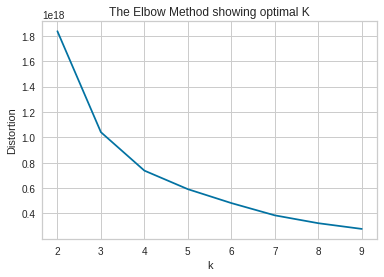

In [159]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 

In [160]:
from yellowbrick.cluster import KElbowVisualizer

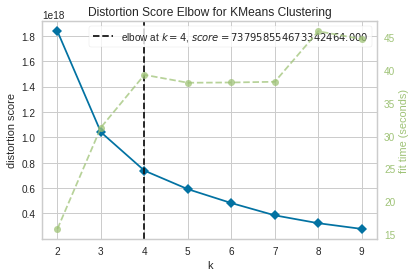

In [161]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [162]:
model=KMeans(n_clusters=4)

In [163]:
model=model.fit(x)

In [164]:
pred=model.predict(x)
pred

array([1, 3, 1, ..., 0, 0, 0], dtype=int32)

In [165]:
x['cluster']=pred

In [166]:
silhouette_score(x,pred)

0.4923029268946749

In [167]:
df2 = df.filter(['Customers.id','Customers.fname','Customers.lname'], axis=1)
df2['Cluster']=pred

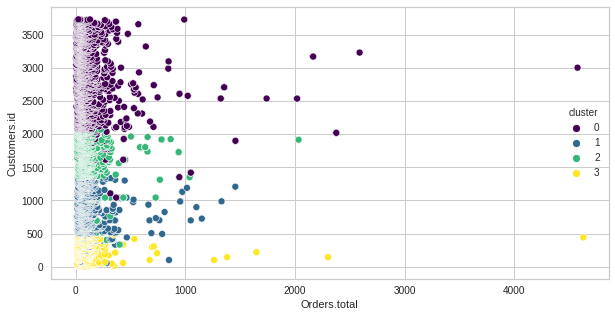

In [168]:
plt.figure(figsize=(10,5))
sns.scatterplot(x["Orders.total"], 
                x['Customers.id'], hue= x.cluster,palette= "viridis");

In [169]:
df2["Cluster"].value_counts()

0    1825
1     974
2     903
3     492
Name: Cluster, dtype: int64